## Homework 5

Avinash Joshi

9 November 2022

AMATH 422 Au 22

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## I

In [2]:
def cell(pi_in, pi_out, N_in, N_out, T): ## simulating spike or not
    rng = np.random.default_rng()

    r = rng.uniform(0,1, N_in)
    spike = np.sum((r >= 1 - pi_in[2])*1) ## in channels open

    r = rng.uniform(0,1, N_out)
    spike -= np.sum((r >= 1 - pi_out[2])*1) ## out channels open

    return int(spike > T) ## whether spike or not

In [3]:
A_in = np.array([[.98,.1,0], [.02, .7, .05], [0, .2, .95]])
A_out = np.array([[.9,.1,0], [.1, .6, .1], [0, .3, .9]])

l_in, v_in = np.linalg.eig(A_in)
l_out, v_out = np.linalg.eig(A_out)

idx_in = np.argsort(l_in)
idx_out = np.argsort(l_out)

pi_in = v_in[:,idx_in[-1]]/np.linalg.norm(v_in[:,idx_in[-1]],1) ## steady-state probability distribution
pi_out = v_out[:,idx_out[-1]]/np.linalg.norm(v_out[:,idx_out[-1]],1)

In [4]:
T_vals = np.round(np.arange(-25,201,1))
spikes_100_50 = np.zeros(len(T_vals))
spikes_10_5 = np.zeros(len(T_vals))
spikes_1000_500 = np.zeros(len(T_vals))

time = 100

for k, T in enumerate(T_vals): ## different T values
    for l in range(time): ## numerous times to "smooth" out function
        spikes_10_5[k] += cell(pi_in = pi_in, pi_out = pi_out, N_in = 10, N_out = 5, T = T)/time
        spikes_100_50[k] += cell(pi_in = pi_in, pi_out = pi_out, N_in = 100, N_out = 50, T = T)/time
        spikes_1000_500[k] += cell(pi_in = pi_in, pi_out = pi_out, N_in = 1000, N_out = 500, T = T)/time

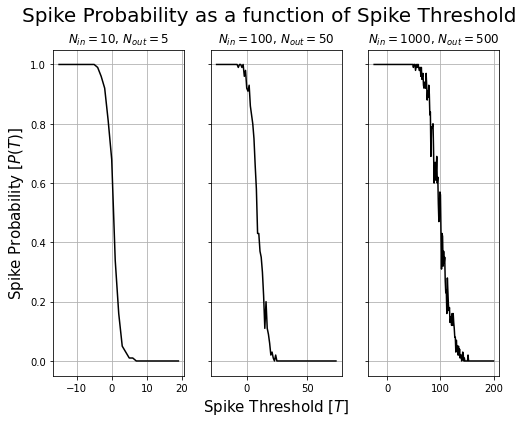

In [5]:
fig, ax = plt.subplots(1,3,sharey = True, figsize = (8,6))
ax[1].plot(T_vals[:100], spikes_100_50[:100], 'k-')
ax[0].plot(T_vals[10:45], spikes_10_5[10:45], 'k-')
ax[2].plot(T_vals, spikes_1000_500, 'k-')
ax[1].set_xlabel('Spike Threshold [$T$]', fontsize = 15)
ax[0].set_ylabel('Spike Probability [$P(T)$]', fontsize = 15)
ax[1].set_title('$N_{in} = 100$, $N_{out} = 50$')
ax[0].set_title('$N_{in} = 10$, $N_{out} = 5$')
ax[2].set_title('$N_{in} = 1000$, $N_{out} = 500$')
ax[0].grid()
ax[1].grid()
ax[2].grid()
fig.suptitle('Spike Probability as a function of Spike Threshold', fontsize = 20)
plt.show()

As the number of both outward and inward ion channels is increased, while making sure to keep their ratio, $\dfrac{N_{in}}{N_{out}} = 2$, the same, the spike threshold $T$ were $P(T) = 0.5$ increases roughly proprtional to $\frac{N_{in}}{10}$, i.e., after increasing $N_{in} = 10$ to $N_{in} = 100$, the T value for which $P(T) = 0.5$ went from $T=1$ to about $T=10$. 

Before this final $T$ value where $P(t) = 0.5$, the probability decreased linearly when increasing $T$ from when $P(T) = 1$ to $P(T) = 0$, the region I define as $R$. Note: for small values of $N_{in}$ and $N_{out}$, the region $R$ does not exactly decrease linearly, but for large values of $N$, $R$ begins to resemble the Heaviside or step function from $P(T)=1$ to $P(T)=0$ at some value $T$.

This region $R$ initially increases when $N_{in}$ and $N_{out}$ are increased by a factor of $10$ (from $10$ and $5$ to $100$ and $50$, respectively) and is centered around $T=10$ with the $len(R) \approx 20$, but when increased by another factor of 10, $R$ is centered around $T=100$ with $len(R) < 100$. This implies that, as the amount of inward and outward ion channels is increased, the spike threshold value $T$ which $R$ is "centered" around multiplicatively increases proportional to the increase in $N_{in}$ and $N_{out}$ while $len(R)$ only increases by less than the increase in $N_{in}$ and $N_{out}$. This follows the general trend of the Signal to Noise Ratio (SNR) and the principle of the Deterministic Limit indicating that, for sufficiently large $N_{in}$ and $N_{out}$, there exists a singular spike threshold value, dubbed $T_{limit}$, for which $P(T<T_{limit}) = 1$ and $P(T\geq T_{limit}) = 0$. Therefore, in deterministic models of cell dynamics, a fixed spiking threshold value, $T_{limit}$, can be used without any significant loss of information.